## Our goal is to predict if a person's income exceeds 50k/ year

Dataset taken from UCI Machine Learning Repository
Link: https://archive.ics.uci.edu/dataset/2/adult

In [45]:
# importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# importing the dataset
df = pd.read_csv("adult.data")

In [47]:
# view the head of the dataset
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis

In [48]:
# provide proper names to the columns of the dataframe
df.columns = ["age", "workclass", "fnlwgt", "education", "educationnum","maritalstatus", "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hour-per-week", "native_country", "income"]

In [49]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hour-per-week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educationnum    32560 non-null  int64 
 5   maritalstatus   32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capitalgain     32560 non-null  int64 
 11  capitalloss     32560 non-null  int64 
 12  hour-per-week   32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Let's explore each column carefully for any extreneous values

In [51]:
df["age"].dtypes  # age is alright since all the values in it are integers

dtype('int64')

In [52]:
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [53]:
df[df["workclass"] == " ?"]

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hour-per-week,native_country,income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [54]:
# we can drop the rows with " ?" character to clean the data
df = df[df["workclass"] != " ?"]

In [55]:
df["maritalstatus"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [56]:
df["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [57]:
# let's drop the rows where occupation is " ?"
df = df[df["occupation"] != " ?"]

In [58]:
df["relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [59]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [60]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [61]:
df["capitalgain"].dtypes

dtype('int64')

In [62]:
df["capitalloss"].dtypes

dtype('int64')

In [63]:
df["hour-per-week"].dtypes

dtype('int64')

In [64]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [65]:
# let's drop the records where native_country is " ?"
df = df[df["native_country"] != " ?"]

We see that most of the string features have a leading space in front of them so we remove the leading space for each of the columns

In [66]:
df["race"].dtype == "O"

True

In [67]:
for col in df.columns:
    if df[col].dtype == "O":
        df[col] = df[col].str.strip()

## Now since the data is clean, let's perform some feature Engineering

In [68]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hour-per-week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [69]:
df["educationnum"].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [70]:
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

Seems like the columns "education" and "educationnum" represent the same information, so let's  drop the education column as it's a better idea to have categorical data in terms of numbers

In [71]:
df.drop("education", axis = 1, inplace = True)

In [72]:
df.head()

,age,workclass,fnlwgt,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hour-per-week,native_country,income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [73]:
df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [80]:
df["income"] = (df["income"] == ">50K").astype(int)

In [82]:
df["income"].value_counts()

0    22653
1     7508
Name: income, dtype: int64

In [32]:
# Converting the income column into an int data type
df["income"] = (df["income"] == "<=50K").astype(int)

In [44]:
(df["income"] == 1).sum()

0

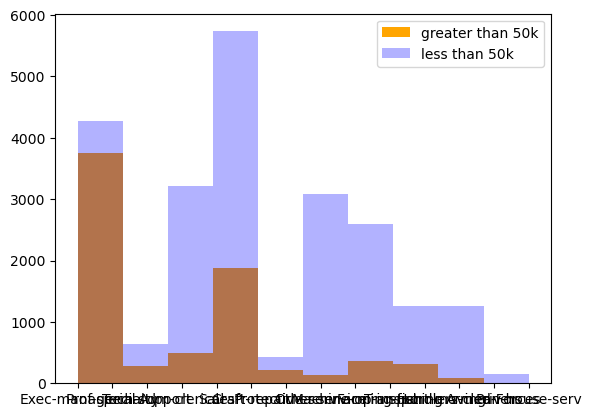

In [95]:
plt.hist(df[df["income"] == 1]["occupation"], label = "greater than 50k", color = "orange")
plt.hist(df[df["income"] == 0]["occupation"], label = "less than 50k",alpha = 0.3, color  = "blue")
plt.legend()
plt.show()

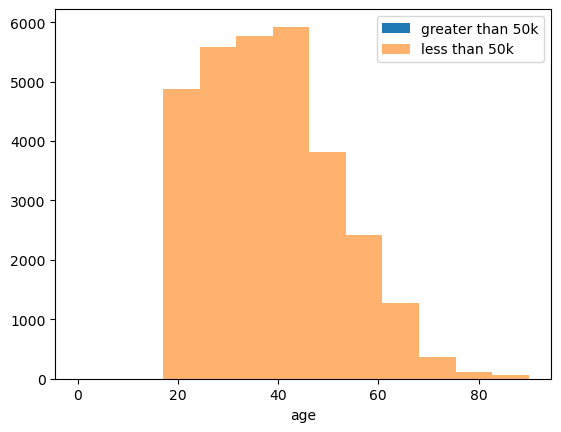

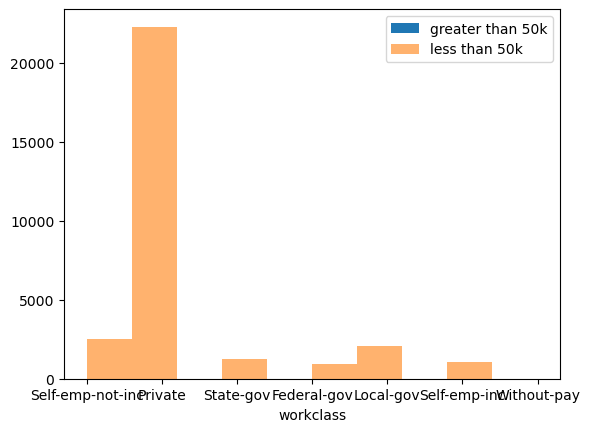

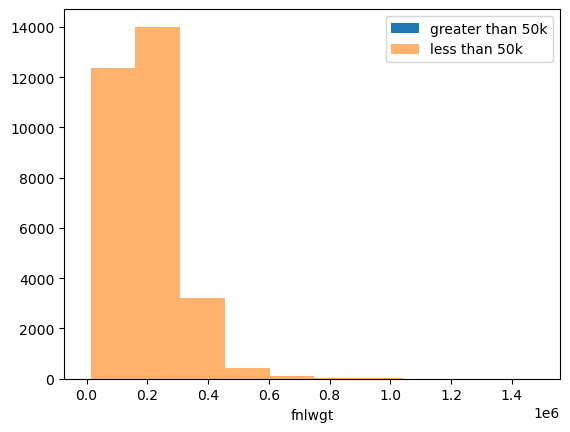

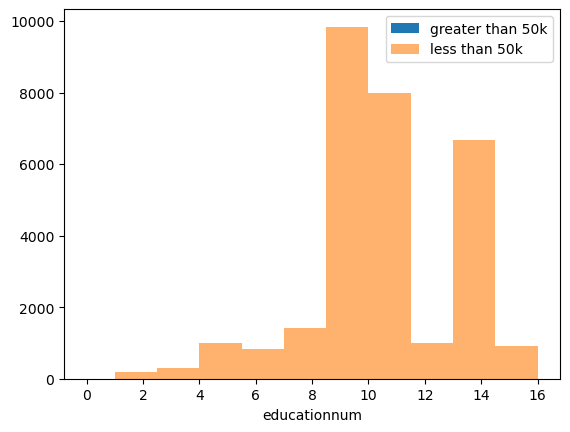

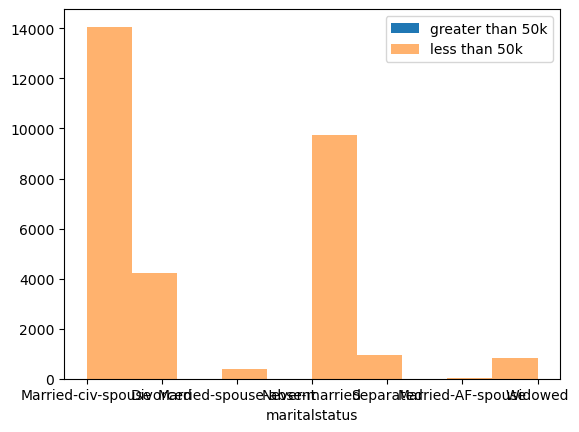

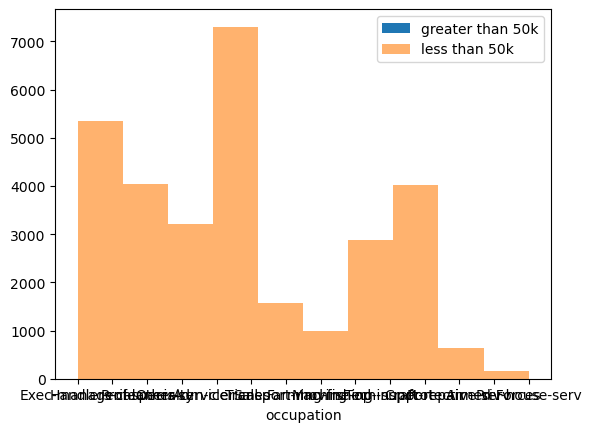

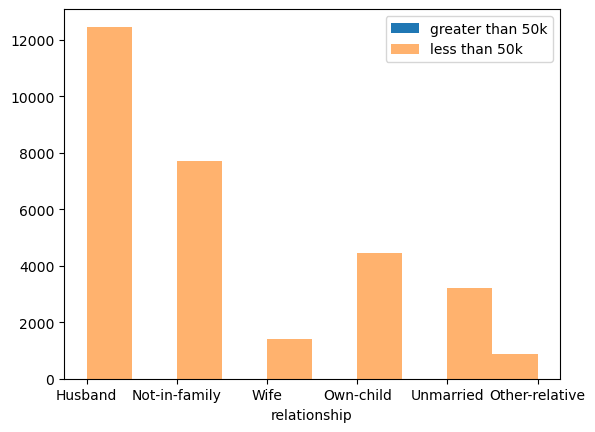

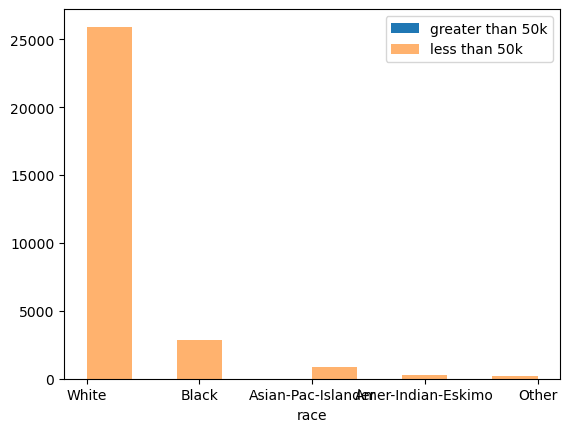

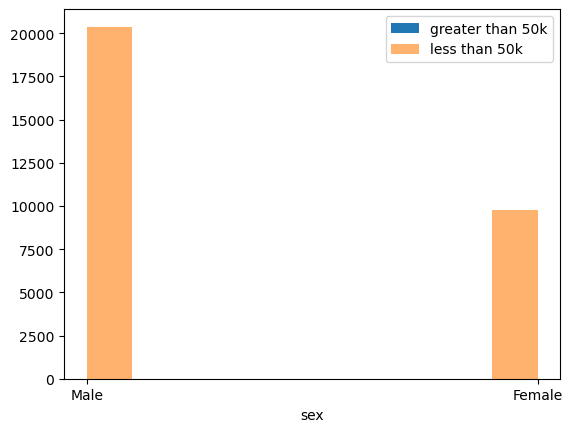

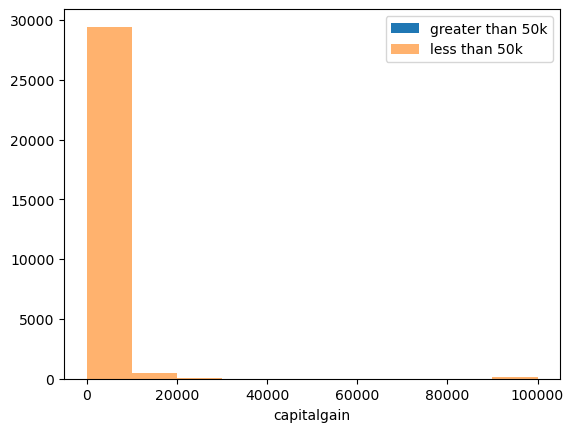

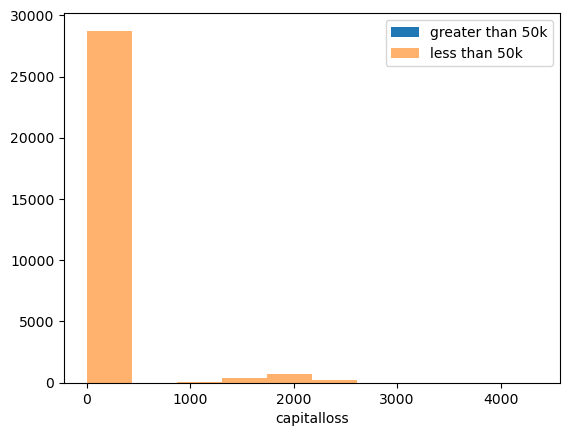

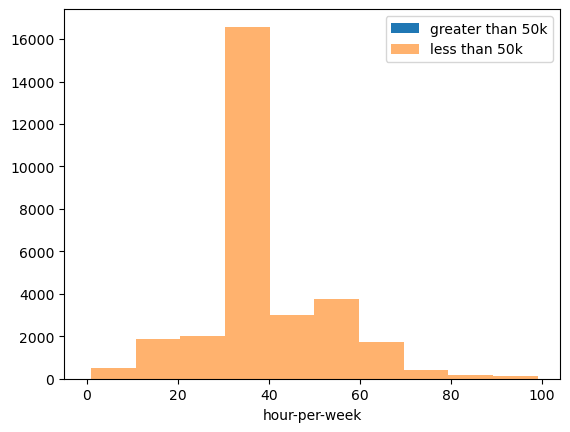

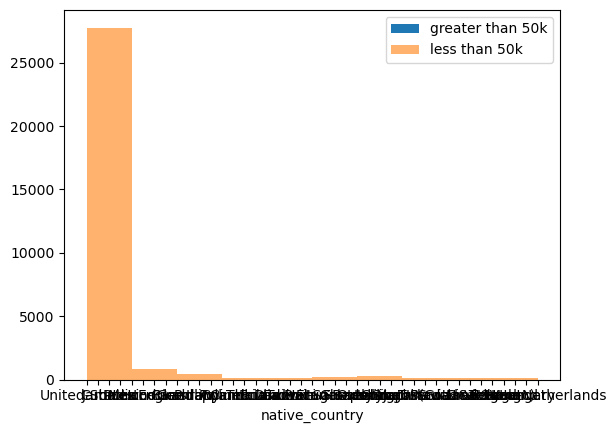

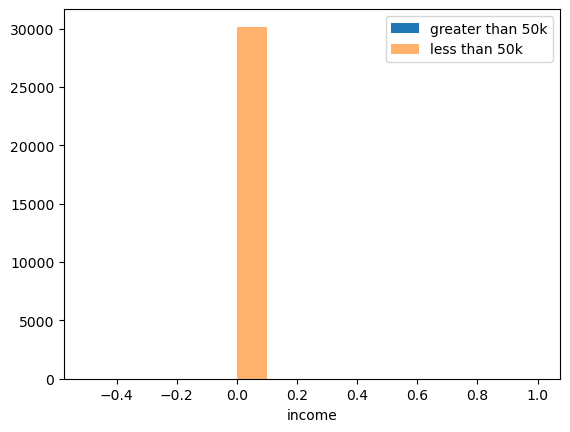

In [39]:
# let's try to understand the relationship between each feature and the target income
for col_name in df.columns:
    plt.hist(df[df["income"] == 1][col_name], label = "greater than 50k")
    plt.hist(df[df["income"] == 0][col_name], label = "less than 50k",alpha = 0.6)
    plt.xlabel(col_name)
    plt.legend()
    plt.show()